### Notebook to analyse the results for the different models as collected in a results folder

In [30]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np

In [31]:
def load_summary_stats(root_dir: str, filename_pattern: str = "summary_stats.json") -> pd.DataFrame:
    """
    Recursively scan `root_dir` for JSON files matching `filename_pattern` (e.g. 'summary_stats.json'),
    load them, and return a concatenated DataFrame with all fields.
    """
    all_data = []
    
    # Walk through all subfolders and look for JSON files named 'summary_stats.json'
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file == filename_pattern:
                file_path = os.path.join(subdir, file)
                try:
                    with open(file_path, "r") as f:
                        data = json.load(f)
                    # Optionally add the file path or subdir for reference:
                    data["file_path"] = file_path
                    data["directory"] = os.path.basename(subdir)
                    all_data.append(data)
                except Exception as e:
                    print(f"Could not load {file_path}: {e}")
    
    # Convert the list of dicts to a DataFrame
    if not all_data:
        print("No matching JSON files found.")
        return pd.DataFrame()
    df = pd.DataFrame(all_data)
    return df

In [32]:
results_folder = "results_20250113"

df_stats = load_summary_stats(results_folder, filename_pattern="summary_stats.json")
if not df_stats.empty:
    # print("DataFrame with all summary stats:")
    # display(df_stats)

    learning_type_order = ["zero_shot", "one_shot", "few_shot"]
    df_stats["learning_type"] = pd.Categorical(df_stats["learning_type"], categories=learning_type_order, ordered=True)

    # Group metrics by (model_name, learning_type, dataset_type)
    grouped = df_stats.groupby(["model_name", "learning_type", "dataset_type"])[
        ["precision", "recall", "f1_score", "accuracy", "true_positives", "false_positives", "true_negatives", "false_negatives"]
    ].mean()
    print("Mean metrics by (model_name, learning_type, dataset_type):")
    display(grouped)
else:
    print("No data to analyze or plot.")

Mean metrics by (model_name, learning_type, dataset_type):


/tmp/ipykernel_1386846/634319613.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_stats.groupby(["model_name", "learning_type", "dataset_type"])[


precision    recall  f1_score  \
model_name learning_type dataset_type                                  
llama3.2   zero_shot     test_set       0.642757  0.285090  0.394987   
                         val_set        0.636675  0.288125  0.396717   
           one_shot      test_set       0.535117  0.074860  0.131345   
                         val_set        0.565124  0.081282  0.142122   
           few_shot      test_set       0.642991  0.053649  0.099036   
                         val_set        0.639932  0.058059  0.106458   
mistral    zero_shot     test_set       0.669312  0.447286  0.536225   
                         val_set        0.663822  0.457656  0.541789   
           one_shot      test_set       0.648195  0.481597  0.552613   
                         val_set        0.642011  0.486453  0.553510   
           few_shot      test_set       0.643804  0.522614  0.576913   
                         val_set        0.647383  0.526707  0.580843   
phi4       zero_shot     test_set       0.807148  0.658609  0.725352   
                         val_set        0.814243  0.669144  0.734597   
           one_shot      test_set            NaN       NaN       NaN   
                         val_set             NaN       NaN       NaN   
           few_shot      test_set            NaN       NaN       NaN   
                         val_set             NaN       NaN       NaN   

                                       accuracy  true_positives  \
model_name learning_type dataset_type                             
llama3.2   zero_shot     test_set      0.560578          1828.0   
                         val_set       0.556218          1861.0   
           one_shot      test_set      0.501805           480.0   
                         val_set       0.503058           525.0   
           few_shot      test_set      0.508867           344.0   
                         val_set       0.506429           375.0   
mistral    zero_shot     test_set      0.610719          2868.0   
                         val_set       0.607966          2956.0   
           one_shot      test_set      0.607659          3088.0   
                         val_set       0.602556          3142.0   
           few_shot      test_set      0.614328          3351.0   
                         val_set       0.615023          3402.0   
phi4       zero_shot     test_set      0.749058          4223.0   
                         val_set       0.755136          4322.0   
           one_shot      test_set           NaN             NaN   
                         val_set            NaN             NaN   
           few_shot      test_set           NaN             NaN   
                         val_set            NaN             NaN   

                                       false_positives  true_negatives  \
model_name learning_type dataset_type                                    
llama3.2   zero_shot     test_set               1016.0          5316.0   
                         val_set                1062.0          5233.0   
           one_shot      test_set                417.0          5915.0   
                         val_set                 404.0          5891.0   
           few_shot      test_set                191.0          6141.0   
                         val_set                 211.0          6084.0   
mistral    zero_shot     test_set               1417.0          4915.0   
                         val_set                1497.0          4798.0   
           one_shot      test_set               1676.0          4656.0   
                         val_set                1752.0          4543.0   
           few_shot      test_set               1854.0          4478.0   
                         val_set                1853.0          4442.0   
phi4       zero_shot     test_set               1009.0          5323.0   
                         val_set                 986.0          5309.0   
           one_shot      test_set                  NaN             NaN   

### Visualization of results

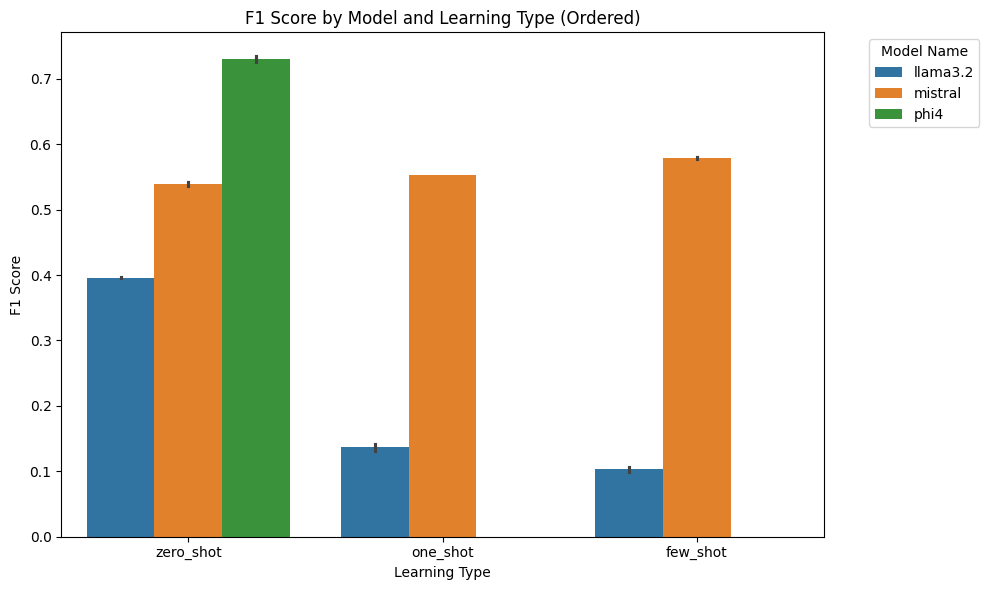

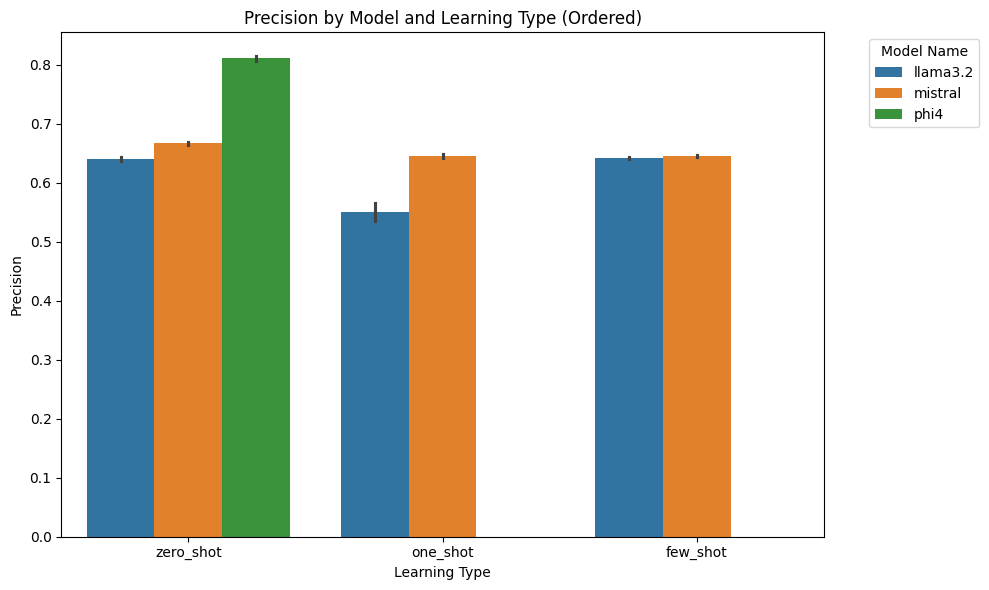

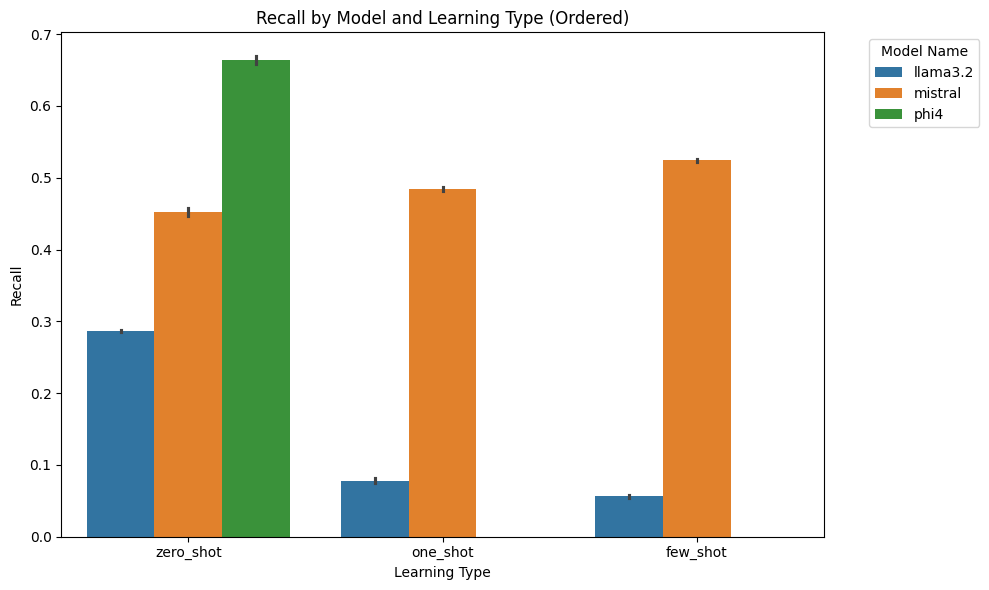

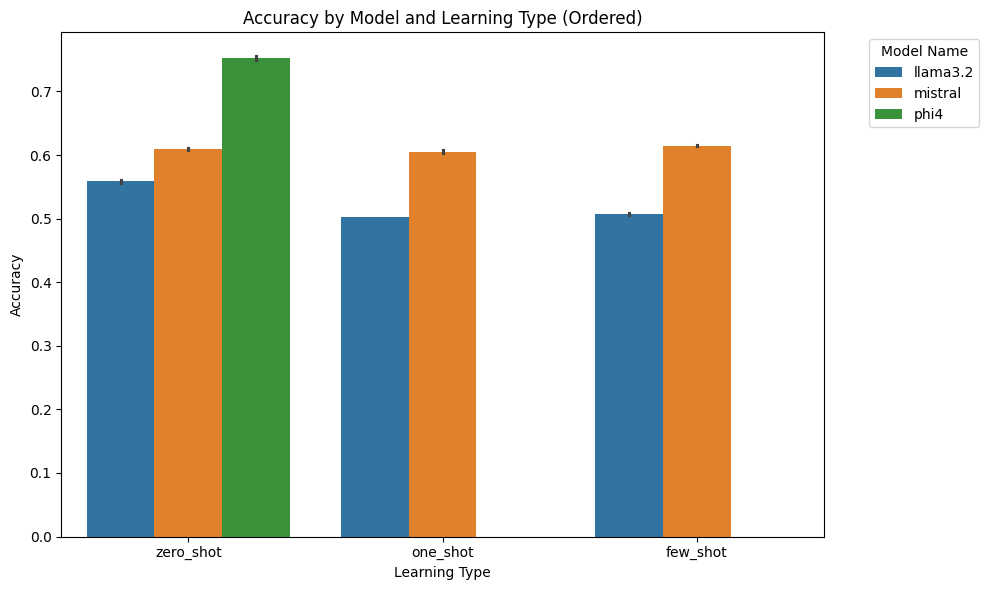

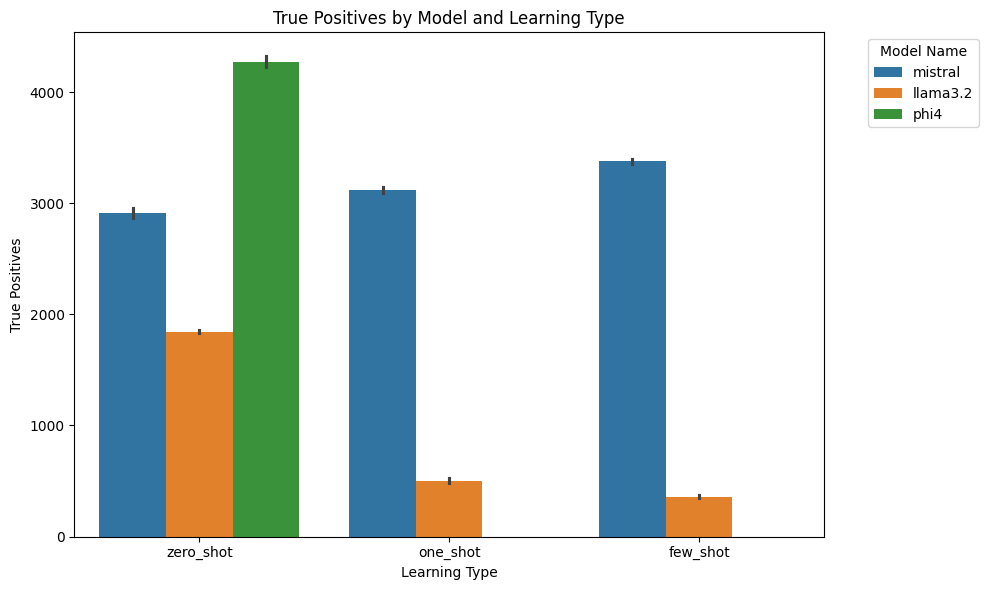

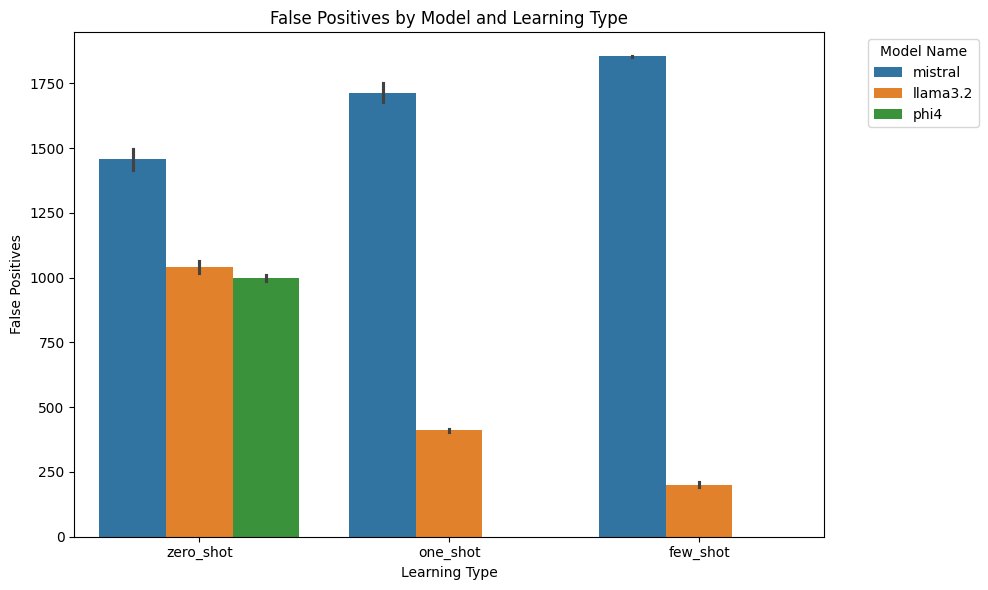

In [33]:
metrics_to_sort = ["f1_score", "precision", "recall", "accuracy"]
sorted_dfs = {
    metric: df_stats.sort_values(by=metric, ascending=True)
    for metric in metrics_to_sort
}

# Define a function to plot bar charts
def plot_metric_bar(metric, title, xlabel, ylabel, sorted_data, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.barplot(
        data=sorted_data,
        x="learning_type",
        y=metric,
        hue="model_name",
        order=learning_type_order,  # Fix learning type order
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title="Model Name", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


# Visualization: F1 Score
plot_metric_bar(
    metric="f1_score",
    title="F1 Score by Model and Learning Type (Ordered)",
    xlabel="Learning Type",
    ylabel="F1 Score",
    sorted_data=sorted_dfs["f1_score"],
)

# Visualization: Precision
plot_metric_bar(
    metric="precision",
    title="Precision by Model and Learning Type (Ordered)",
    xlabel="Learning Type",
    ylabel="Precision",
    sorted_data=sorted_dfs["precision"],
)

# Visualization: Recall
plot_metric_bar(
    metric="recall",
    title="Recall by Model and Learning Type (Ordered)",
    xlabel="Learning Type",
    ylabel="Recall",
    sorted_data=sorted_dfs["recall"],
)

# Visualization: Accuracy
plot_metric_bar(
    metric="accuracy",
    title="Accuracy by Model and Learning Type (Ordered)",
    xlabel="Learning Type",
    ylabel="Accuracy",
    sorted_data=sorted_dfs["accuracy"],
)

# Plot Confusion Matrix components
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_stats,
    x="learning_type",
    y="true_positives",
    hue="model_name",
    order=df_stats["learning_type"].unique(),
)
plt.title("True Positives by Model and Learning Type")
plt.xlabel("Learning Type")
plt.ylabel("True Positives")
plt.legend(title="Model Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_stats,
    x="learning_type",
    y="false_positives",
    hue="model_name",
    order=df_stats["learning_type"].unique(),
)
plt.title("False Positives by Model and Learning Type")
plt.xlabel("Learning Type")
plt.ylabel("False Positives")
plt.legend(title="Model Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

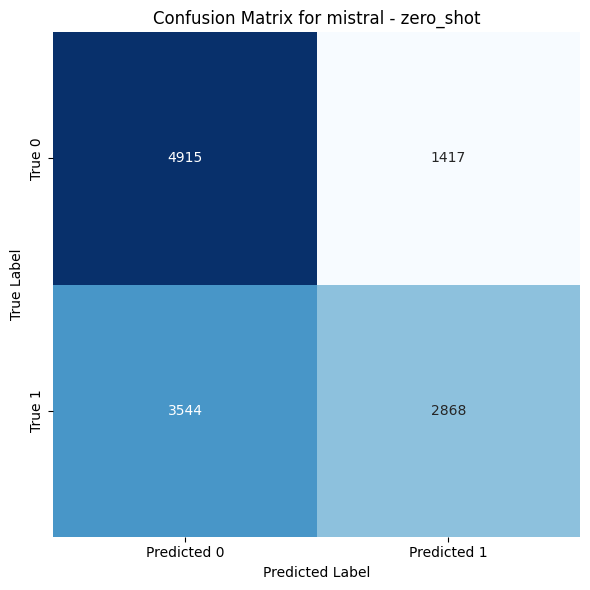

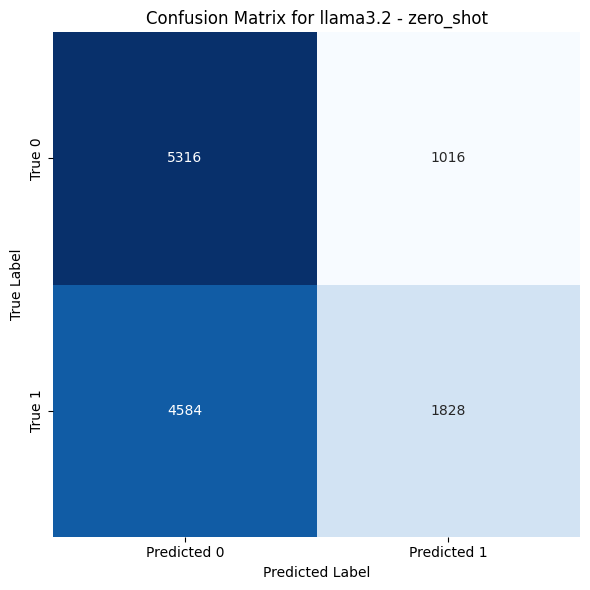

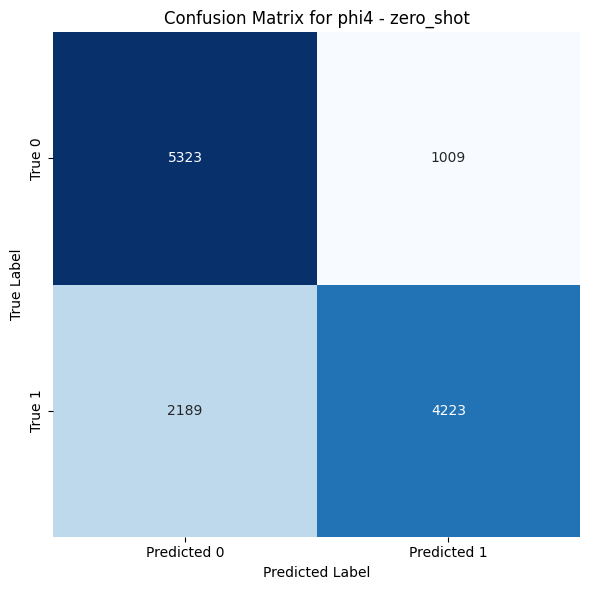

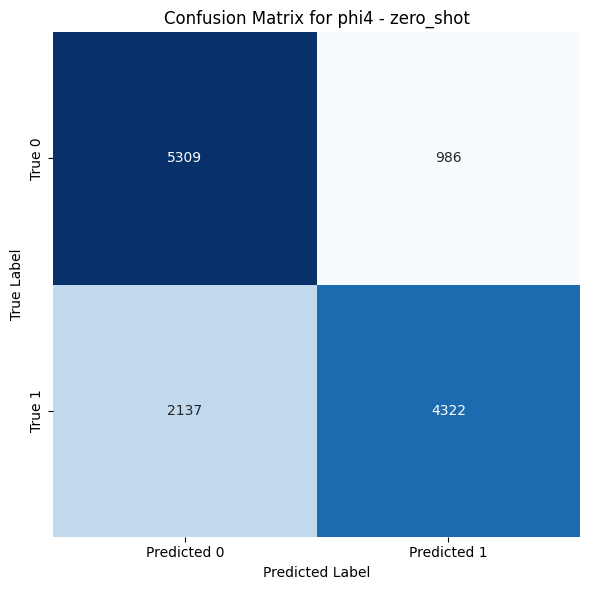

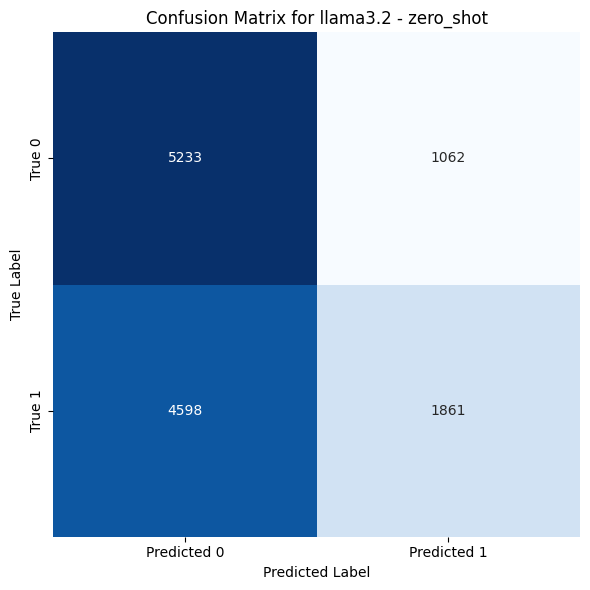

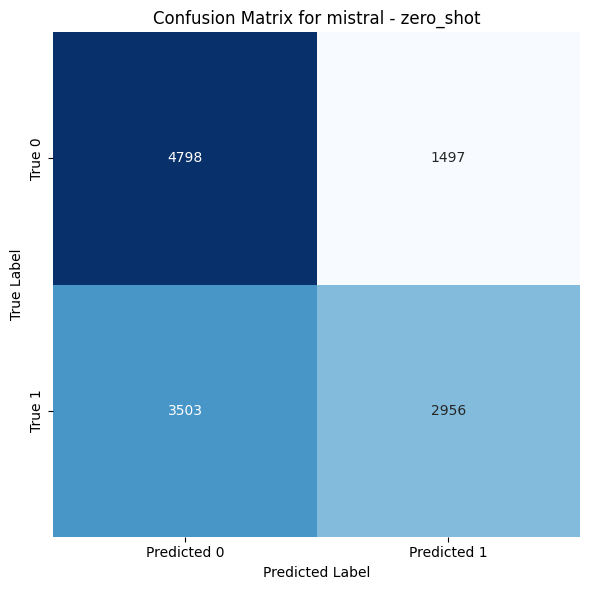

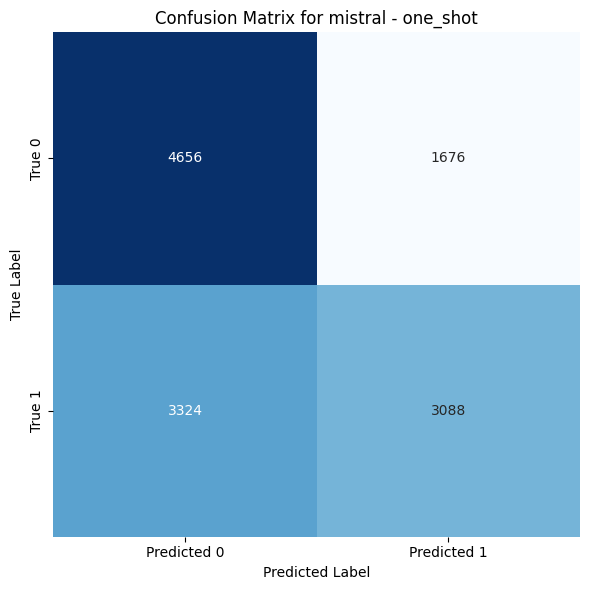

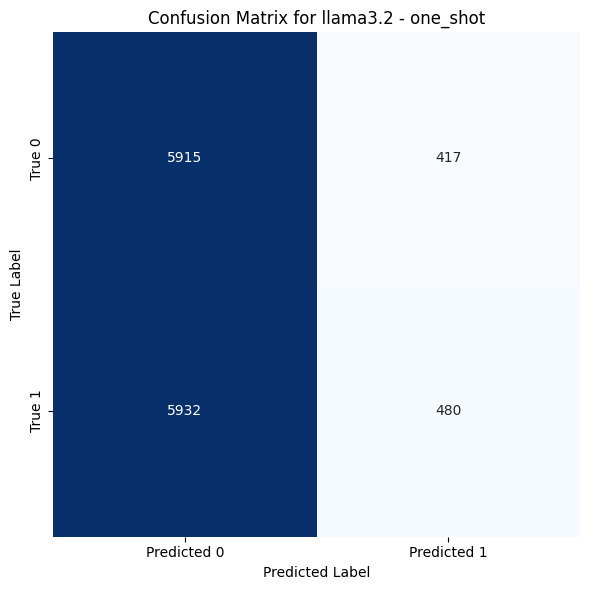

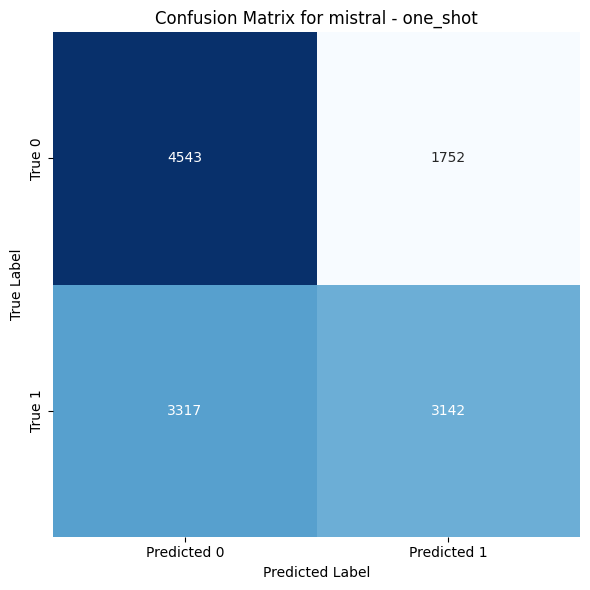

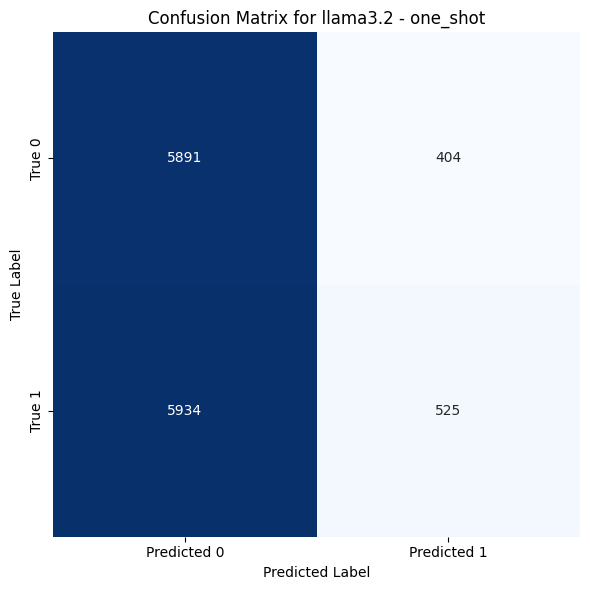

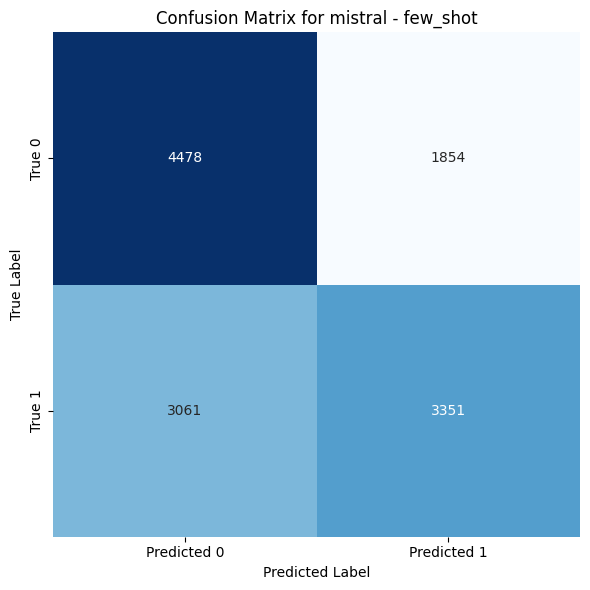

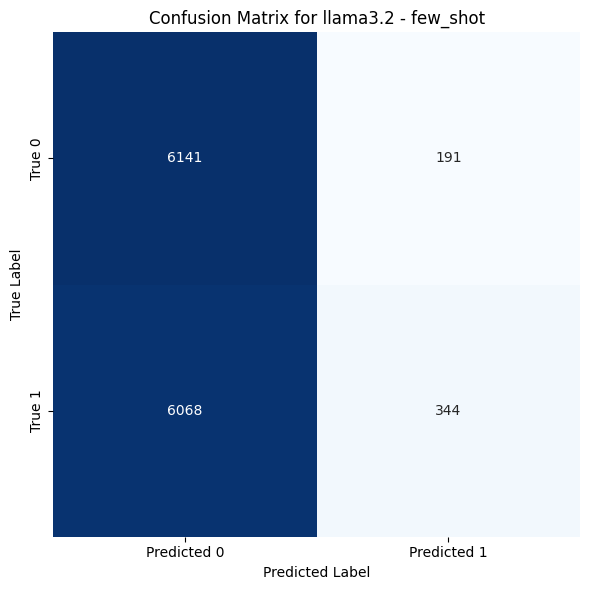

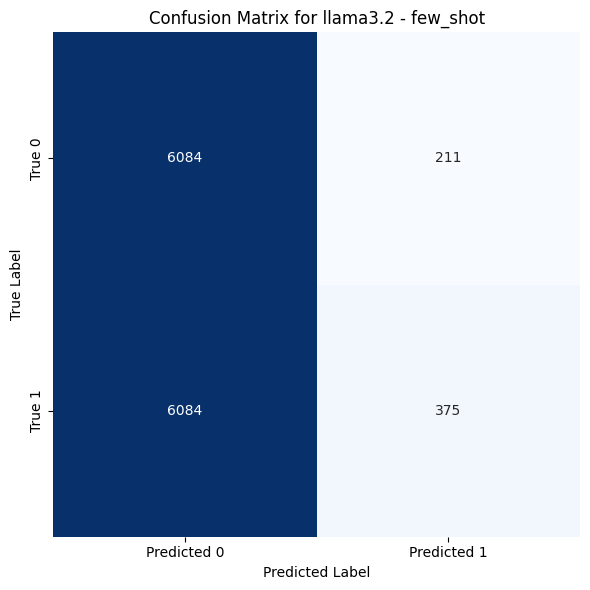

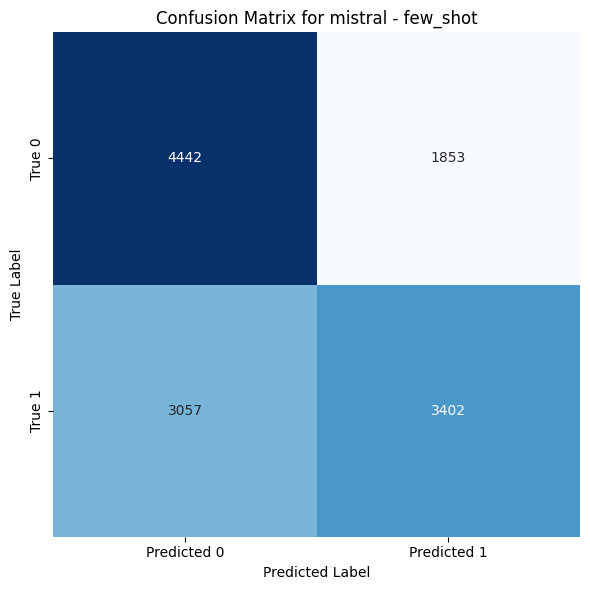

In [34]:
# Plot Confusion Matrices
def plot_confusion_matrix(row, title, figsize=(6, 6)):
    """
    Plot a single confusion matrix from a row in the DataFrame.

    Args:
        row (pd.Series): A single row of the DataFrame containing confusion matrix components.
        title (str): Title of the plot.
        figsize (tuple): Size of the plot.
    """
    cm = np.array(row["confusion_matrix"])
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["True 0", "True 1"])
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Generate confusion matrices for each (model_name, learning_type)
for _, row in df_stats.iterrows():
    plot_confusion_matrix(
        row,
        title=f"Confusion Matrix for {row['model_name']} - {row['learning_type']}"
    )